# Classifying Iris Flowers 【Draft】

In [1]:
# dataset
from sklearn import datasets
# plot
import seaborn as sns
sns.set_style("darkgrid")
import matplotlib.pyplot as plt
# data manipulation
import pandas as pd
import numpy as np
# To display image in the jupyter notebook cell
%matplotlib inline

## Question

How could machine learn from data? To answer this question, let's look at an example first: there is a data set winch consists two species of Iris, how to classify those two species? When given a new Iris, how to predict which Iris category it belongs to?

## Data Set

The data set we will use is modified from the Iris dataset which can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Iris/). It consists of 50 samples from each of **two species** of Iris (Iris setosa, Iris virginica). **Two features** were measured from each sample: the length of the sepals and petals, in centimeters.

Let's get a close look at the dataset.

In [2]:
# read csv file
iris_dataset = pd.read_csv("iris_data.csv")
# show the first 5 lines
iris_dataset.head()

,sepal length (cm),petal length (cm),target_class
0,5.1,1.4,1
1,4.9,1.4,1
2,4.7,1.3,1
3,4.6,1.5,1
4,5.0,1.4,1


The columns in this dataset are:
- sepal length in cm
- petal length in cm
- Species
    - target_class 1: setosa
    - target_class -1: versicolor

![](./img/iris.png)

*Image source* [1](https://en.wikipedia.org/wiki/Iris_flower_data_set#/media/File:Iris_versicolor_3.jpg) [2](http://www.twofrog.com/images/iris38a.jpg)


## Classification

The following graph showing the measured sepal length and sepal length of Iris.

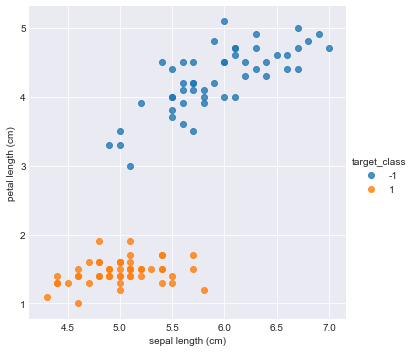

In [3]:
sns.lmplot("sepal length (cm)", "petal length (cm)", data=iris_dataset,fit_reg=False,hue="target_class")

I believe you can classify those two species category immediately.

Get back to our question, identify which category a new Iris belongs to?

Suppose the new Iris' sepal length is 5.5 cm and petal length is 3.2. We draw this new Iris to the plot.

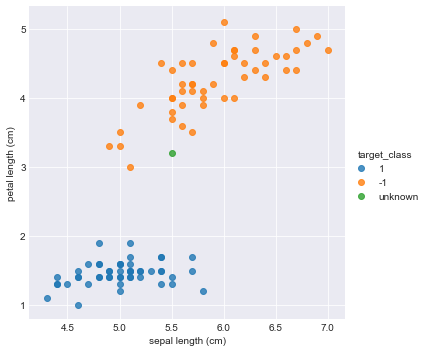

In [4]:
new_iris_dataset = iris_dataset.append([{"sepal length (cm)":5.5, "petal length (cm)":3.2,"target_class":"unknown"}])
sns.lmplot("sepal length (cm)", "petal length (cm)", data=new_iris_dataset,fit_reg=False,hue="target_class")

The unknown dot is the new Iris. Obviously, it belongs to versicolor specie (target_clss=-1).

## A simple Classifier

This task is easy for us. We can classify them by eyes. Howevere, the computer doesn't has eyes, how can it split those two groups?

You may have noticed that this is a two-dimensional plane, and if  want to separate the two classes, we can put a line between them. It looks like the following plot.

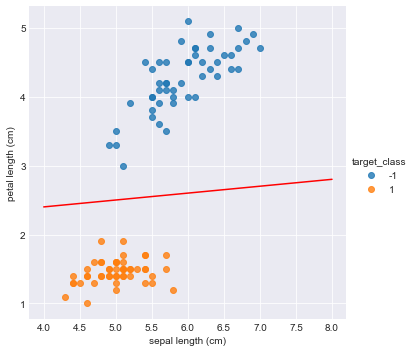

In [5]:
x = np.linspace(4,8,18)
a = 0.1
b = 2
y = a * x + b

sns.lmplot("sepal length (cm)", "petal length (cm)", data=iris_dataset,fit_reg=False,hue="target_class")
plt.plot(x, y, '-r')

All the points above the line are setosa category(-1), and all the points below the line are versicolor category(1). When a new Iris comes, a computer can predict which category it falls into by deciding whether it is above or below the line. 

Therefore, **if we can teach computer to find such a kind of line, we can solve our problem!** Let's do it.

In formal, this line in a two-dimensional plane can be represent as following:
 
$$y = a*x + b $$

In other words, y is the function f of x:

$$f(x) = ax + b$$



(1) equal to:

$$ a*x - y + b  = 0$$

let

$$w_0 = b$$
$$w_1 = a$$
$$w_2 = -1$$


then it becomes:

$$w_1*x + w_2*y + w_0 = 0$$

Therefore, mathematics form, all points above the line are:

$$w_1*x + w_2*y + w_0 > 0$$

and all points below the line are:

$$w_1*x + w_2*y + w_0 < 0$$.


Because $f(x)$ is a linear function, we call it **a linear classifier**.

![](./img/simple.png)


$x, y$

$w_0, w_1$


为之后输出表示方便，我们用 x_2 替换 y。

得到：

$$w_1*x_1 + w_2*x_2 + w_0 = 0$$



We'll use data to train this line to be a suitable linear classifier. Essentially, it's looking for suitable parameters of $w_0$, $w_1$, $w_2$.

## Perceptron Learning Algorithm










Actually, in deep learning, this is **a Simplified Perceptron**.

### Training a linear classifier

To focus on the essential concept, we simply the problem by supposing that parameter $b$ is known as 2.

Which means the liner function becomes:

$$y = ax + 2$$

We'll use data to train this line to be a suitable linear classifier. Essentially, it's looking for a suitable parameter $a$.

To get start, we choose a randome value 0.6 for $a$.

In [15]:
def draw_classify(a,direction=""):
    x = np.linspace(4,7.5,18)
    y = a*x + b
    
    sns.lmplot("sepal length (cm)", "petal length (cm)", data=iris_dataset,fit_reg=False,hue="target_class")
    plt.plot(x, y, '-r',)
    
    label="y={0}*x + 2".format(str(a))
    plt.text(6.5,3.8,label,fontsize=15)
    
    if direction == 1:
        direction = r'↑'
    elif direction == -1:
        direction = r'↓'
    else: direction = ""
    
    plt.text(7.5, a*7.5+1.8, direction, fontsize=25, va='bottom')
    
    plt.show()

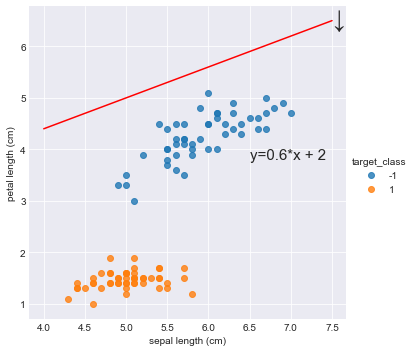

In [16]:
a = 0.6
draw_classify(a,-1)

It seems that this classifier is not so good, it doesn't split those two species. All dots are below it. So, we need to move the line down a bit.

We want to see if we can find a repeatable recipe to do this, a series of computer instructions, which computer scientists call an algorithm.

How much should we move down?

step length = 0.4

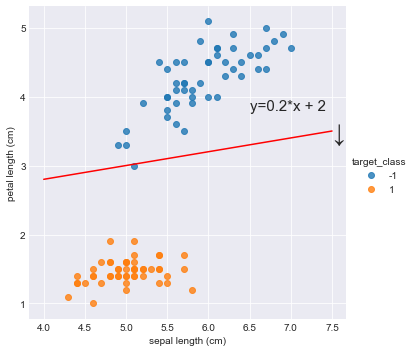

In [17]:
a = 0.2
draw_classify(a,-1)

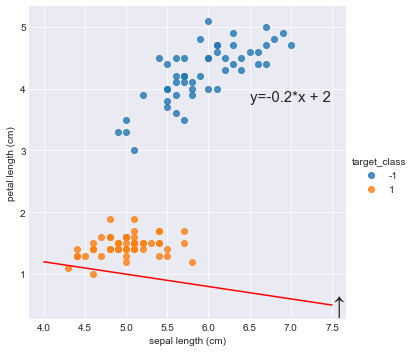

In [18]:
a = -0.2
draw_classify(a,1)

## Reference
- [perceptron introduction](https://medium.com/jameslearningnote/資料分析-機器學習-第3-2講-線性分類-感知器-perceptron-介紹-84d8b809f866)